# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [140]:
# Import warnings
import warnings



In [142]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib as mlib
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2



# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [148]:
# Try loading one file


df = pd.read_parquet('2023-1.parquet')
# df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [152]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload



def extractMonthlySampleData (filePath):
    df = pd.read_parquet(filePath)  #'trip_records/2023-1.parquet'
    # Extract date and hour from pickup datetime
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
    df_group_day_hour = df.groupby(["pickup_date", "pickup_hour"])
    sample_df_rows = []
    
    for (pickup_date, pickup_hour), hour_data in df_group_day_hour:
           sampled = hour_data.sample(frac=0.05, random_state=42)
           sample_df_rows.append(sampled)
    
    monthly_sample = pd.concat(sample_df_rows, ignore_index=True)
    return monthly_sample


In [156]:
sample = extractMonthlySampleData ('2023-1.parquet')
sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour
0,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,N,141,140,1,...,1.0,0.5,2.00,0.0,1.0,13.50,2.5,0.00,2022-12-31,23
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0


In [158]:
# from google.colab import drive
# drive.mount('/content/drive')
print(f"sample : {sample.shape}")

sample : (152087, 21)


In [160]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\Sherry\UpgradExample\Datasets and Dictionary-NYC\Starter Notebook - EDA NYC Taxi\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
       

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        sampled_data = extractMonthlySampleData(file_path)
        print (f"file_name : {file_name}  sampled_data.shape:{sampled_data.shape}")
        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df =  pd.concat([df,sampled_data])
        print (f"file_name : {file_name}  df.shape:{df.shape}")
        #df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print("completed processing")
#df = pd.concat(df, ignore_index=True)
df.info()


file_name : 2023-1.parquet  sampled_data.shape:(152087, 21)
file_name : 2023-1.parquet  df.shape:(152087, 21)
file_name : 2023-10.parquet  sampled_data.shape:(174255, 21)
file_name : 2023-10.parquet  df.shape:(326342, 22)
file_name : 2023-11.parquet  sampled_data.shape:(165133, 21)
file_name : 2023-11.parquet  df.shape:(491475, 22)
file_name : 2023-12.parquet  sampled_data.shape:(166709, 21)
file_name : 2023-12.parquet  df.shape:(658184, 22)
file_name : 2023-2.parquet  sampled_data.shape:(168696, 21)
file_name : 2023-2.parquet  df.shape:(826880, 22)
file_name : 2023-3.parquet  sampled_data.shape:(163786, 21)
file_name : 2023-3.parquet  df.shape:(990666, 22)
file_name : 2023-4.parquet  sampled_data.shape:(139641, 21)
file_name : 2023-4.parquet  df.shape:(1130307, 22)
file_name : 2023-5.parquet  sampled_data.shape:(144458, 21)
file_name : 2023-5.parquet  df.shape:(1274765, 22)
file_name : 2023-6.parquet  sampled_data.shape:(162910, 21)
file_name : 2023-6.parquet  df.shape:(1437675, 22)
f

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [178]:
df.to_csv('sample-2023-ex1.csv', index=False)

In [162]:
# Store the df in csv/parquet
df.to_parquet('sample-2023-v1.parquet')
print (df.shape)

(1991327, 22)


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [180]:
# Load the new data file

df = pd.read_parquet('sample-2023-v1.parquet')

In [182]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,2,2022-12-31 23:51:30,2022-12-31 23:56:06,1.0,0.86,1.0,N,141,140,1,...,0.5,2.00,0.0,1.0,13.50,2.5,0.00,2022-12-31,23,NaN
1,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
2,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991327 entries, 0 to 94926
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            float6

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [186]:
# Fix the index and drop any columns that are not needed

df.reset_index(drop=True, inplace=True)
# All columns provide some information which can be useful

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [188]:
# Combine the two airport fee columns
print (df[(df['Airport_fee'].isnull()) & (df['airport_fee'].isnull())].shape)
print (df[(df['Airport_fee'].isnull()) & (df['airport_fee'].notnull())].shape)
print (df[(df['Airport_fee'].notnull()) & (df['airport_fee'].isnull())].shape)
print (df[(df['Airport_fee'].notnull()) & (df['airport_fee'].notnull())].shape)

df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
print (df[(df['Airport_fee'].isnull()) & (df['airport_fee'].notnull())].shape)
# (Optional) Drop the duplicate column after merging
df.drop(columns='Airport_fee', inplace=True)

print(df['airport_fee'].isnull().sum())

(68132, 22)
(155904, 22)
(1767291, 22)
(0, 22)
(155904, 22)
68132


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [190]:
# check where values of fare amount are negative


negative_fares = df[df['fare_amount'] < 0]
negative_fares.head()
print (negative_fares.shape) 

(0, 21)


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
## I have created sample multiple times but no fare amount was negative, though there is total amount as negative but that is because of other negative components


In [210]:
# Find which columns have negative values

numeric_df = df.select_dtypes(include='number')
negative_columns = numeric_df.columns[(numeric_df < 0).any()]

print("Columns with negative values:", list(negative_columns))

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [224]:
# fix these negative values
# will use abs function to make negative to positive numbers
(df[negative_columns] < 0).sum()
df[negative_columns] = df[negative_columns].abs()
(df[negative_columns] < 0).sum()


extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [240]:
# Find the proportion of missing values in each column

print(f"proportion of values on percentage of records: \n {df.isnull().mean() * 100} ")
print(f"proportion of values on number of records: \n {df.isnull().sum()} ")

proportion of values on percentage of records: 
 VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.421437
trip_distance            0.000000
RatecodeID               3.421437
store_and_fwd_flag       3.421437
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.421437
airport_fee              3.421437
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64 
proportion of values on number of records: 
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          68132
trip_distance                0
RatecodeID           

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [266]:
# Display the rows with null values
null_rows = df[df.isnull().any(axis=1)]
print ("null_rows Shape: ", null_rows.shape)
print(null_rows.head(10))


# Impute NaN values in 'passenger_count'
most_commonly_used_value = df['passenger_count'].mode()[0]
print("most_commonly_used_value :",most_commonly_used_value)

print ("Before - number of nulls in passenger_count",df['passenger_count'].isnull().sum())
df['passenger_count'].fillna(most_commonly_used_value, inplace=True)

print ("After setting the most_commonly_used_value - number of nulls in passenger_count",df['passenger_count'].isnull().sum())

null_rows Shape:  (68132, 21)
     VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5           2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
16          2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
43          2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
44          2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
47          2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
53          2  2023-01-01 00:55:00   2023-01-01 01:07:00              NaN   
70          1  2023-01-01 00:28:22   2023-01-01 00:41:25              NaN   
78          1  2023-01-01 00:37:09   2023-01-01 00:58:16              NaN   
105         2  2023-01-01 00:58:50   2023-01-01 01:17:07              NaN   
126         2  2023-01-01 00:16:00   2023-01-01 00:38:00              NaN   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
5            19.24         NaN           

C:\Users\Sherry\AppData\Local\Temp\ipykernel_11388\419987922.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passenger_count'].fillna(most_commonly_used_value, inplace=True)


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [278]:
# Fix missing values in 'RatecodeID'

most_commonly_used_RatecodeID = 99
print("most_commonly_used_RatecodeID :",most_commonly_used_RatecodeID)

print ("Before the change- number of nulls in RatecodeID",df['RatecodeID'].isnull().sum())
print ("will change the value with 99 which is equivalent to null/unknown")

df['RatecodeID'].fillna(most_commonly_used_RatecodeID, inplace=True)

print ("After setting the most_commonly_used_value - number of nulls in passenger_count",df['passenger_count'].isnull().sum())

most_commonly_used_RatecodeID : 99
Before the change- number of nulls in RatecodeID 68132
will change the value with 99 which is equivalent to null/unknown
After setting the most_commonly_used_value - number of nulls in passenger_count 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [288]:
# handle null values in congestion_surcharge
# here i will be setting the value as 2.5 after summing up total fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge and then subtracting it with Total. A very good finding was that most of the congestion charge was missing.It should 2.5 as that is the most commonly used value. 

most_commonly_used_cs = df['congestion_surcharge'].mode()[0]
print(most_commonly_used_cs)

df['total_diff'] = df['total_amount'] - (
    df['fare_amount'] +
    df['extra'] +
    df['mta_tax'] +
    df['tip_amount'] +
    df['tolls_amount'] +
    df['improvement_surcharge']
)




2.5


In [292]:
check_cs = (df['congestion_surcharge'].isnull()) & (df['total_diff'] == 2.5)
print(f"Before - Rows available for update: {check_cs.sum()}")
df.loc[
    (df['congestion_surcharge'].isnull()) & (df['total_diff'] == 2.5),
    ['congestion_surcharge', 'airport_fee']
] = [2.5, 0.0]

check_cs = (df['congestion_surcharge'].isnull()) & (df['total_diff'] == 2.5)
print(f"After - Rows availablefor update: {check_cs.sum()}")


Before - Rows available for update: 49245
After - Rows availablefor update: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [296]:
# Handle any remaining missing values
print("number of nulls with congestion_surcharge",df['congestion_surcharge'].isnull().sum())

initial_rows = len(df)
df = df[df['congestion_surcharge'].notnull()]
print(f"Rows after removal: {len(df)} (Removed {initial_rows - len(df)} rows)")

print("number of nulls with congestion_surcharge",df['congestion_surcharge'].isnull().sum())
print("number of nulls with airport_fee",df['airport_fee'].isnull().sum())


number of nulls with congestion_surcharge 18887
Rows after removal: 1972440 (Removed 18887 rows)
number of nulls with congestion_surcharge 0
number of nulls with airport_fee 0


In [306]:
print(f"Before proportion of values on number of records: \n {df['store_and_fwd_flag'].isnull().sum()} ")
most_commonly_used_store_and_fwd_flag = df['store_and_fwd_flag'].mode()[0]
# Will set the flag as N, as anyways I dont see much use of these column for now. Can renmove this later if not used,
df['store_and_fwd_flag'].fillna('N', inplace=True)
print(f"After proportion of values on number of records: \n {df['store_and_fwd_flag'].isnull().sum()} ")


Before proportion of values on number of records: 
 49245 


C:\Users\Sherry\AppData\Local\Temp\ipykernel_11388\3598645282.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_and_fwd_flag'].fillna('N', inplace=True)
C:\Users\Sherry\AppData\Local\Temp\ipykernel_11388\3598645282.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['store_and_fwd_flag'].fillna('N', inplace=True)


After proportion of values on number of records: 
 0 


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

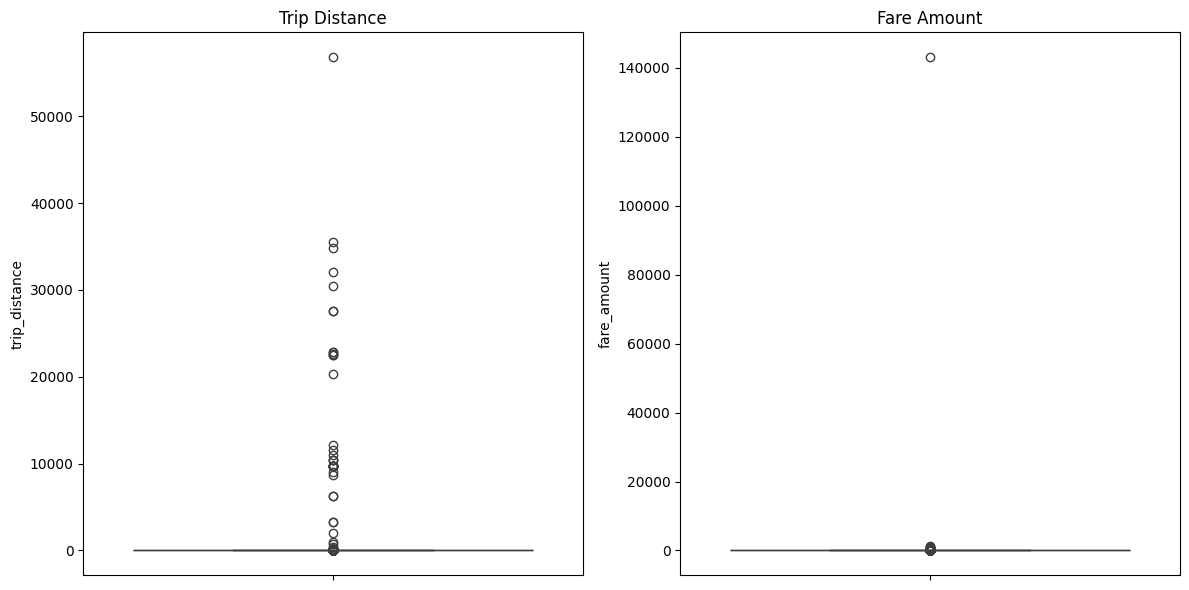

In [316]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for trip_distance
sns.boxplot(y=df['trip_distance'], ax=axes[0])
axes[0].set_title("Trip Distance")

# Box plot for fare_amount
sns.boxplot(y=df['fare_amount'], ax=axes[1])
axes[1].set_title("Fare Amount")

plt.tight_layout()
plt.show()


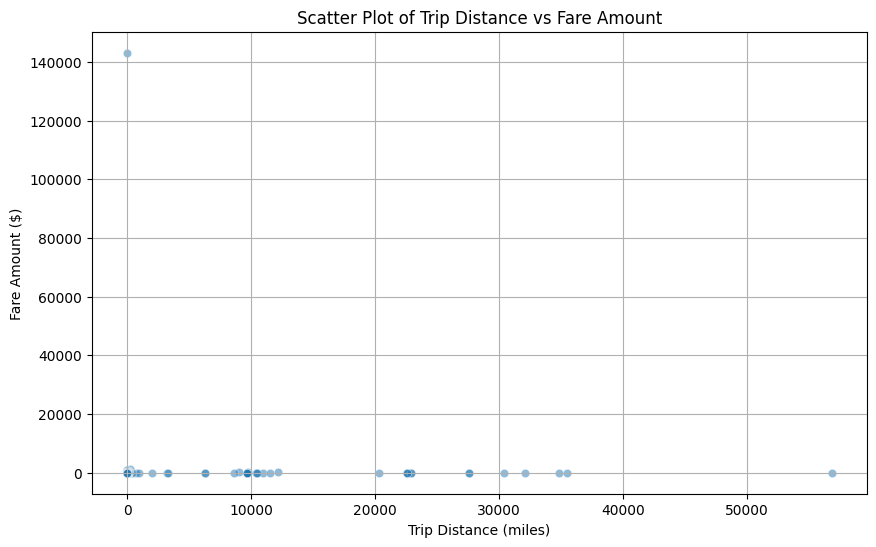

In [319]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5)
plt.title("Scatter Plot of Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()



In [323]:
df['passenger_count'].value_counts()

passenger_count
1.0    1495716
2.0     291012
3.0      72376
4.0      40387
0.0      31234
5.0      25004
6.0      16690
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [325]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [327]:
df['passenger_count'].value_counts()

passenger_count
1.0    1495716
2.0     291012
3.0      72376
4.0      40387
0.0      31234
5.0      25004
6.0      16690
Name: count, dtype: int64

In [339]:
# Continue with outlier handling
#  remove engtries with  trip_distance is  0 and fare_amount is more than 300
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] > 300))]


In [341]:
# remove Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)

df = df[~((df['trip_distance'] == 0) & 
          (df['fare_amount'] == 0) & 
          (df['PULocationID'] != df['DOLocationID']))]


In [355]:
#Remove outlier Fare amounts 
print(len( df[~(df['fare_amount'] > 1500)]))
df =  df[~(df['fare_amount'] > 1500)]
print(len( df[~(df['fare_amount'] > 1500)]))

1972319
1972319


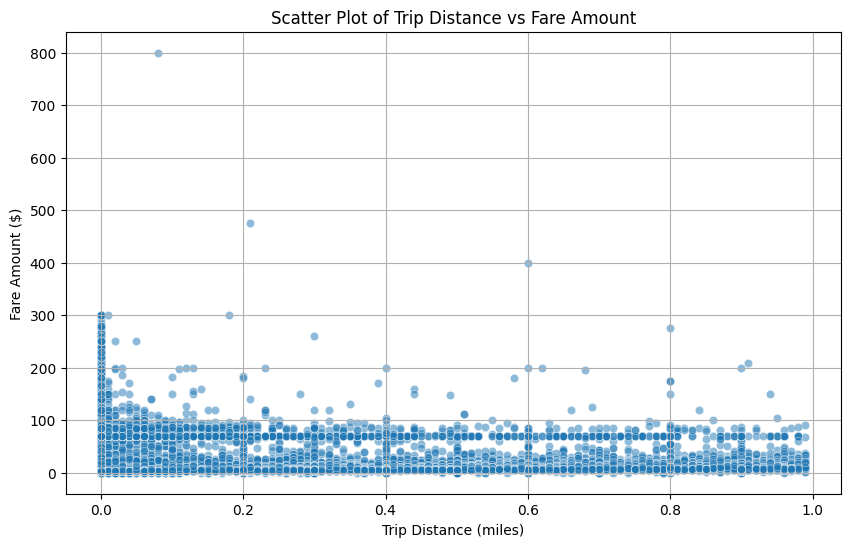

In [359]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df[(df['trip_distance'] < 1)], alpha=0.5)
plt.title("Scatter Plot of Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

In [361]:
#  remove engtries with  trip_distance is around 0.8 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.8) & (df['fare_amount'] > 300))]

In [367]:

#  remove engtries with  trip_distance is  0.4 and fare_amount is more than 400
df = df[~((df['trip_distance'] < 0.4) & (df['fare_amount'] > 200))]

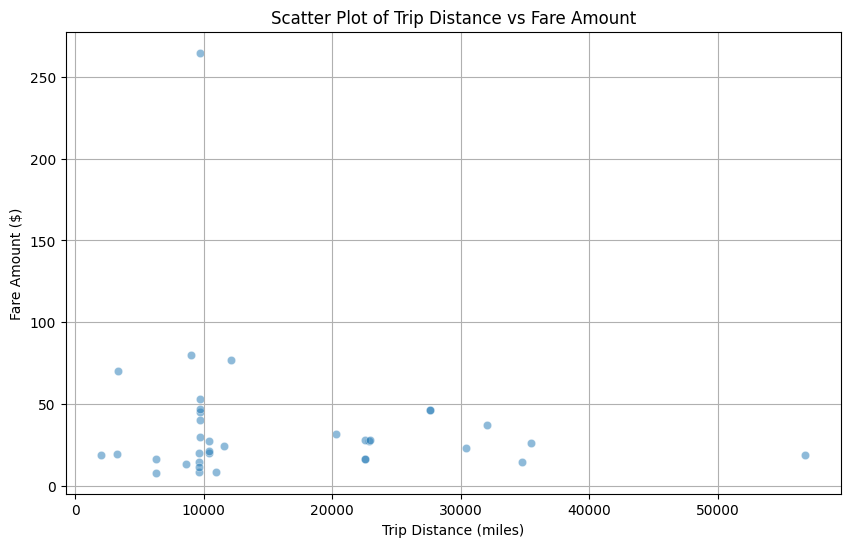

In [371]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df[(df['trip_distance'] > 1000)], alpha=0.5)
plt.title("Scatter Plot of Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

In [377]:
#  remove engtries with  trip_distance motre then 10000 and fare_amount is less than 100
df = df[~((df['trip_distance'] > 10000) & (df['fare_amount'] < 200))]

In [393]:
#  remove engtries with  trip_distance motre then 250 
print(len(df[~((df['trip_distance'] > 250))]))
df = df[~((df['trip_distance'] > 250))]


1972185


In [383]:
df.shape

(1972205, 22)

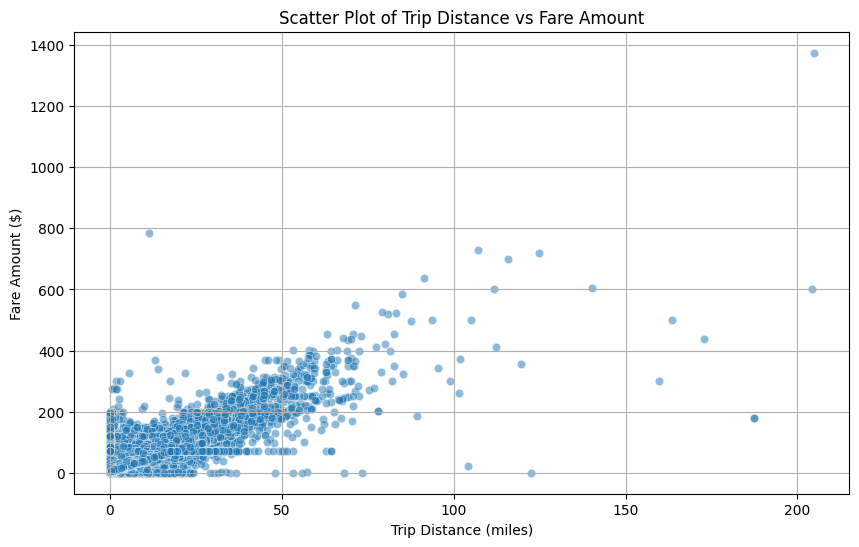

In [395]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df, alpha=0.5)
plt.title("Scatter Plot of Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()

In [400]:
# Do any columns need standardising?

df.describe().loc[['min', 'max']]
df["payment_type"].value_counts()
# 0 is flex fare type

payment_type
1    1566923
2     332211
0      49225
4      14386
3       9440
Name: count, dtype: int64

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [402]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour',
 'total_diff']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical 
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`:Numerical 
* `trip_distance`:Numerical 
* `RatecodeID`: Categorical 
* `PULocationID`: Categorical 
* `DOLocationID`: Categorical 
* `payment_type`: Categorical 
* `pickup_hour`: Numerical 
* `trip_duration`: Numerical 


The following monetary parameters belong in the same category, is it categorical or numerical?

Ans: <b>All the below are numerical<b>

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

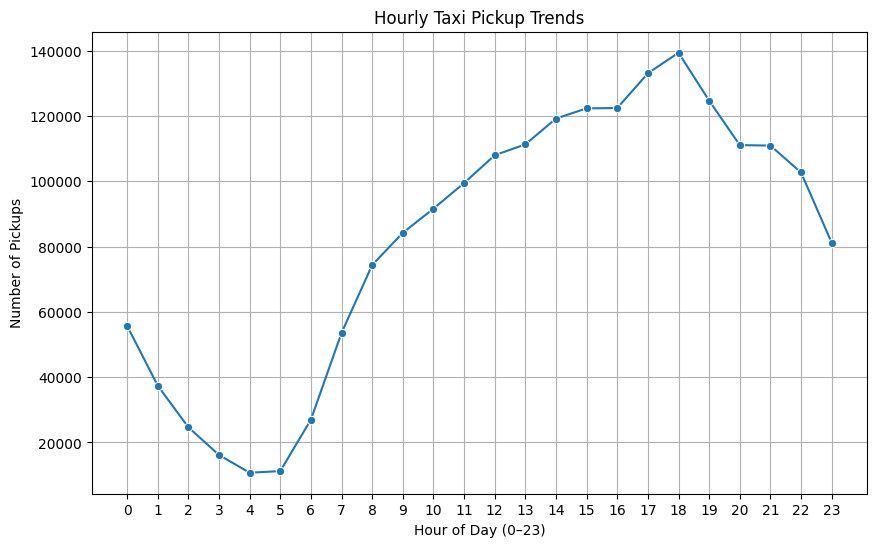

In [412]:
# Find and show the hourly trends in taxi pickups
# using line plot to look at the Pickup trends
hourly_trends = df['pickup_hour'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_trends.index, y=hourly_trends.values, marker='o')
plt.title("Hourly Taxi Pickup Trends")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


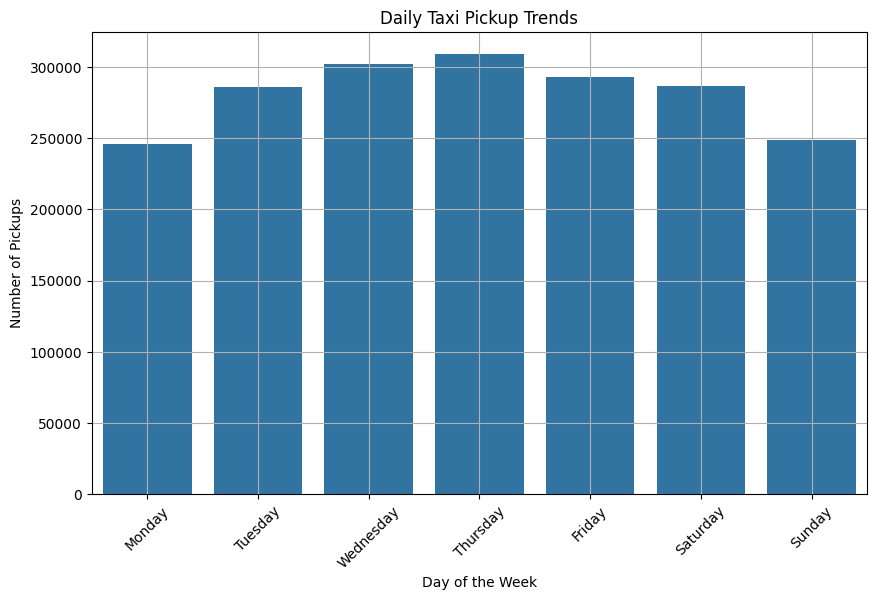

In [416]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

daily_counts = df['pickup_day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])


plt.figure(figsize=(10, 6))
sns.barplot(x=daily_counts.index, y=daily_counts.values)
plt.title("Daily Taxi Pickup Trends")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



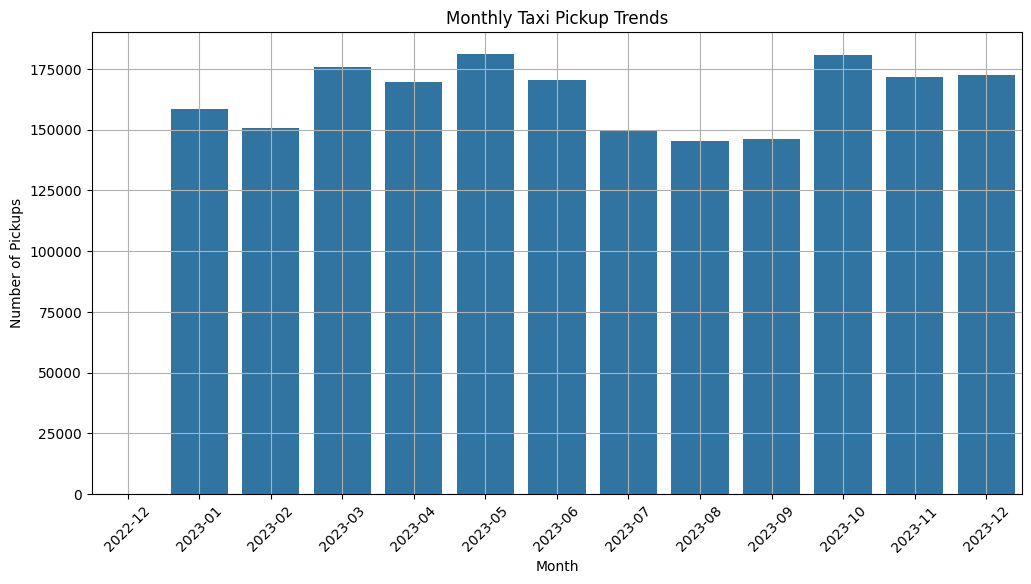

In [418]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M').astype(str)
monthly_counts = df['pickup_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values)
plt.title("Monthly Taxi Pickup Trends")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [420]:
# Analyse the above parameters

cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {zero_count} zeros, {negative_count} negatives")


fare_amount: 605 zeros, 0 negatives
tip_amount: 451627 zeros, 0 negatives
total_amount: 270 zeros, 0 negatives
trip_distance: 35884 zeros, 0 negatives


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [425]:
# Create a df with non zero entries for the selected parameters.
# Removing only those rows which have fare_amount or total amount as zero.

df = df[~((df['fare_amount'] == 0) | (df['total_amount'] == 0))]

for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {zero_count} zeros, {negative_count} negatives")


fare_amount: 0 zeros, 0 negatives
tip_amount: 451042 zeros, 0 negatives
total_amount: 0 zeros, 0 negatives
trip_distance: 35612 zeros, 0 negatives


In [437]:
zero_count = ((df['trip_distance'] == 0) & (df['fare_amount'] <= 25 )).sum()
total_count = len(df)
percentage = (zero_count / total_count) * 100

print(f"Percentage of zero trip_distance records: {percentage:.2f}%")


Percentage of zero trip_distance records: 1.23%


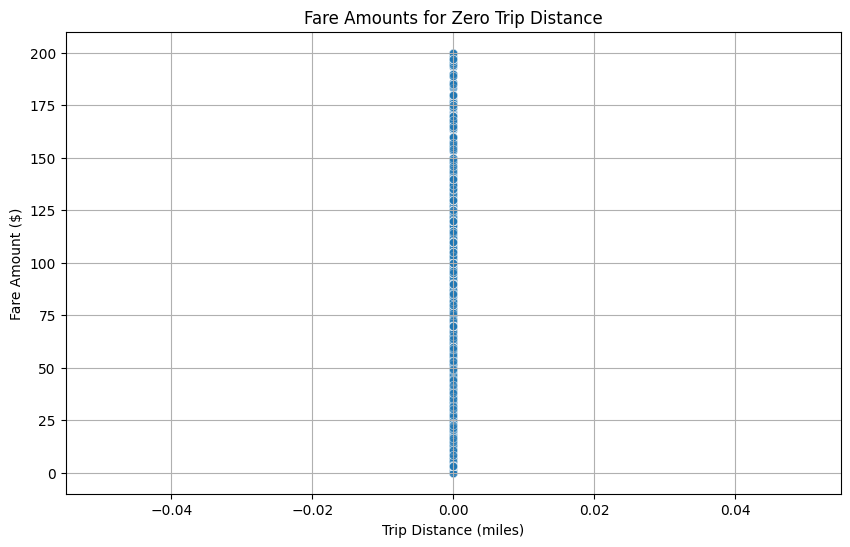

In [427]:
zero_distance_df = df[df['trip_distance'] == 0]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=zero_distance_df, alpha=0.6)
plt.title("Fare Amounts for Zero Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()


In [439]:
# only removing all the records with trip distance as 0 and amount less 25 dollars
df = df[~ ((df['trip_distance'] == 0) & (df['fare_amount'] <= 25 ))]

In [441]:
zero_count = ((df['trip_distance'] == 0) ).sum()
total_count = len(df)
percentage = (zero_count / total_count) * 100

print(f"Percentage of zero trip_distance records: {percentage:.2f}%")

Percentage of zero trip_distance records: 0.58%


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

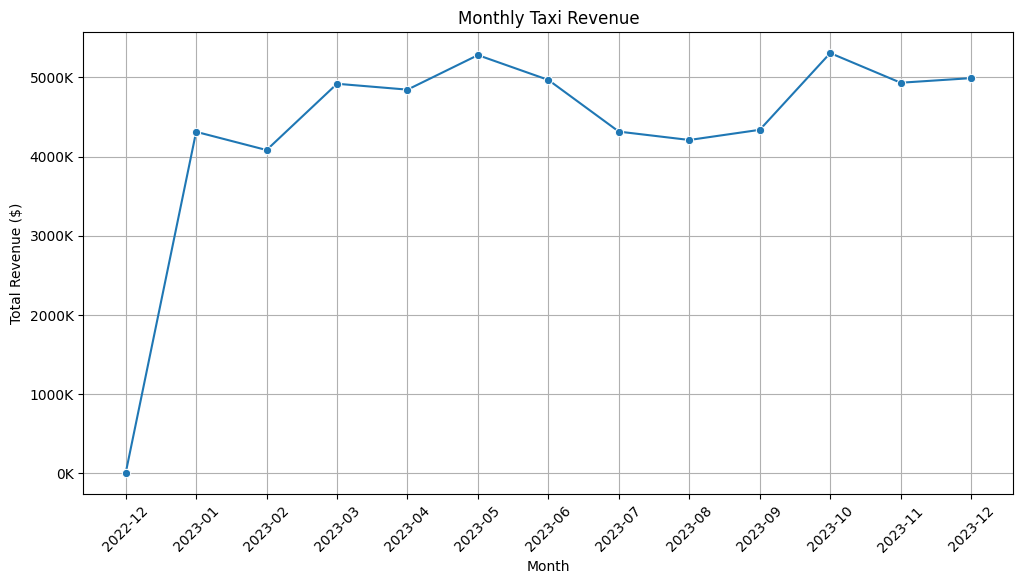

In [449]:
# Group data by month and analyse monthly revenue
import matplotlib.ticker as ticker

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))

plt.title("Monthly Taxi Revenue")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [451]:
# Calculate proportion of each quarter
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()
annual_revenue = quarterly_revenue.sum()
quarterly_proportion = (quarterly_revenue / annual_revenue) * 100
print(quarterly_proportion.round(2))



pickup_quarter
2022Q4     0.00
2023Q1    23.56
2023Q2    26.72
2023Q3    22.76
2023Q4    26.96
Freq: Q-DEC, Name: total_amount, dtype: float64


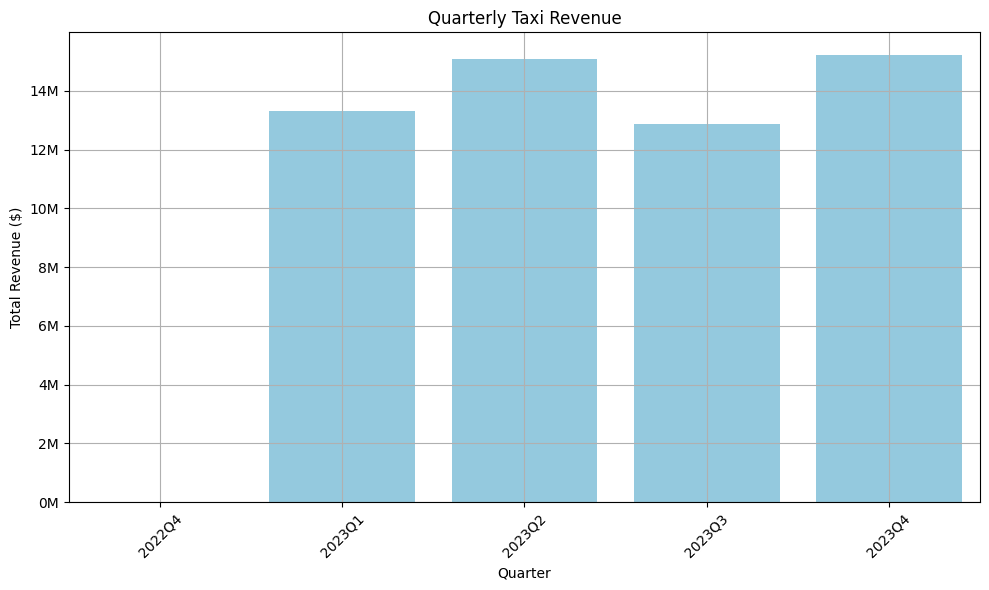

In [457]:
plt.figure(figsize=(10, 6))
sns.barplot(x=quarterly_revenue.index.astype(str), y=quarterly_revenue.values, color='skyblue')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000000:.0f}M'))
plt.title("Quarterly Taxi Revenue")
plt.xlabel("Quarter")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

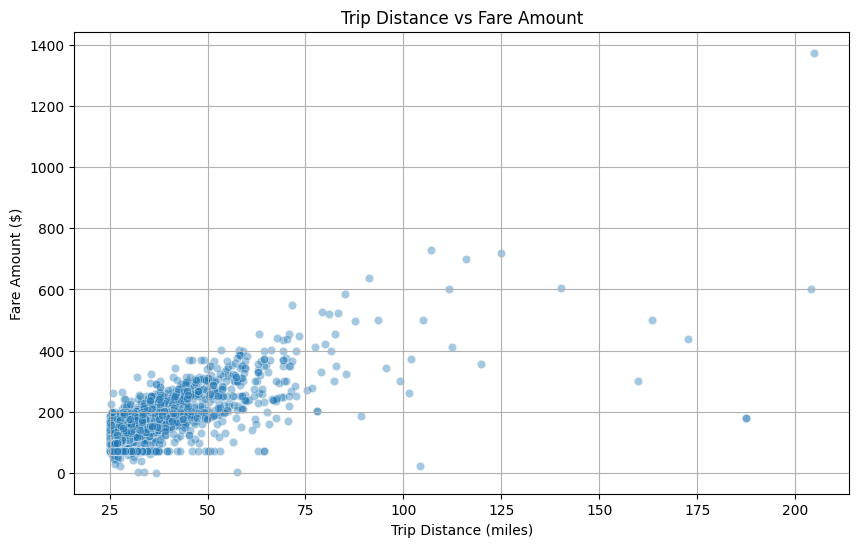

In [463]:
# Show how trip fare is affected by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df[(df['trip_distance'] > 25)], alpha=0.4)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [467]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'pickup_date',
       'pickup_hour', 'total_diff', 'pickup_day', 'pickup_month',
       'pickup_quarter'],
      dtype='object')

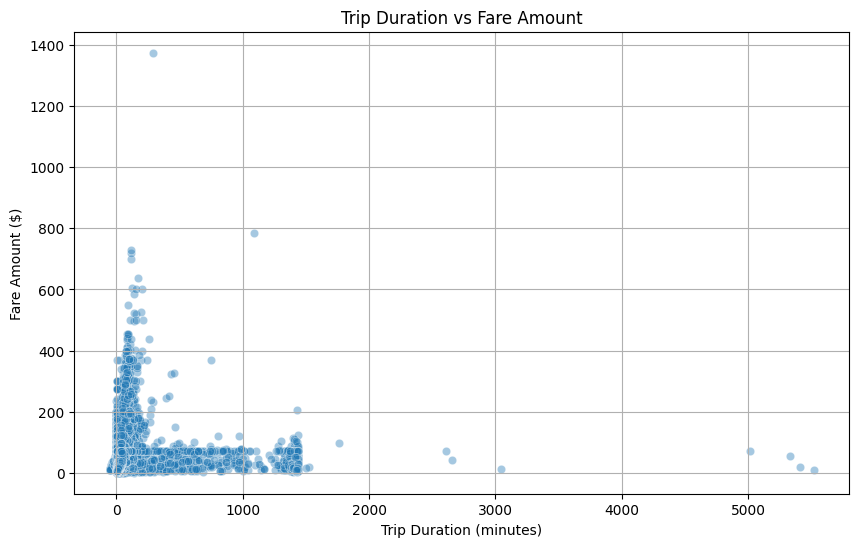

In [469]:
# Show relationship between fare and trip duration
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.4)
plt.title("Trip Duration vs Fare Amount")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()


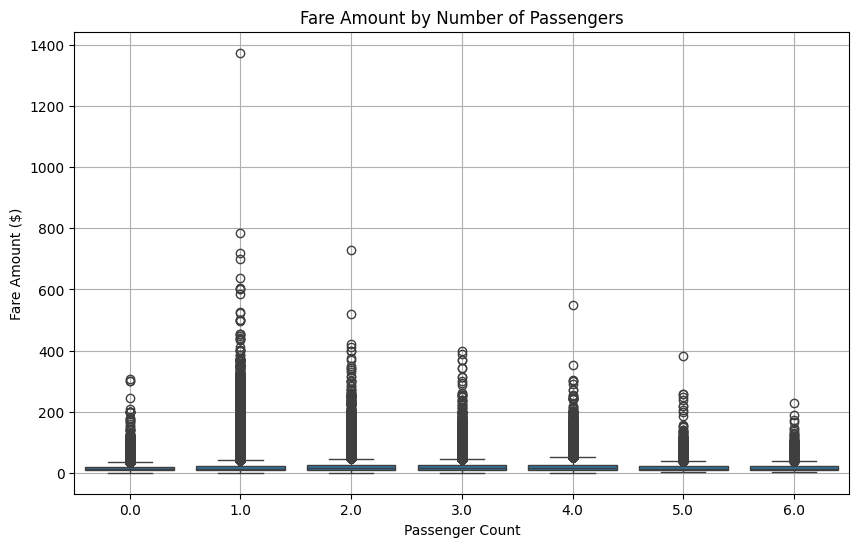

In [475]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Fare Amount by Number of Passengers")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.show()


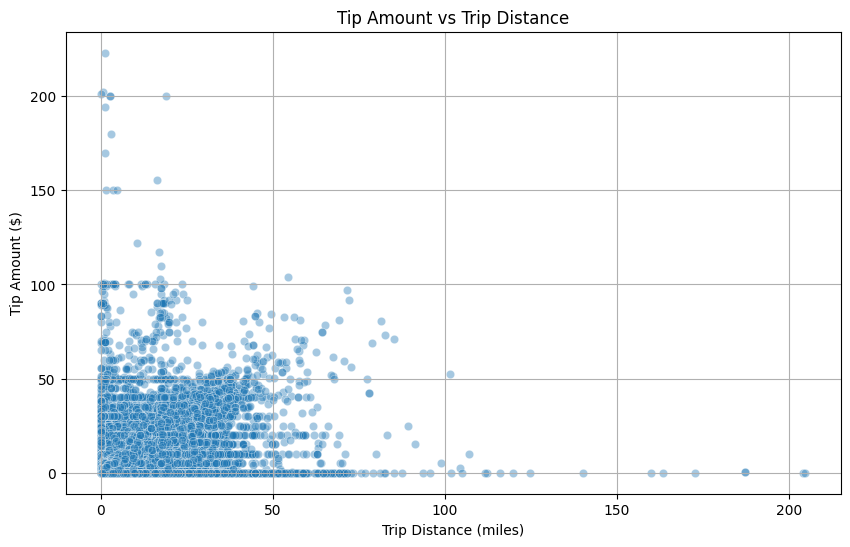

In [477]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, alpha=0.4)
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True)
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [485]:
payment_labels = {
    0: 'Flex Fare',
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute'
}
df['payment_type_label'] = df['payment_type'].map(payment_labels)


C:\Users\Sherry\AppData\Local\Temp\ipykernel_11388\3317766951.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')


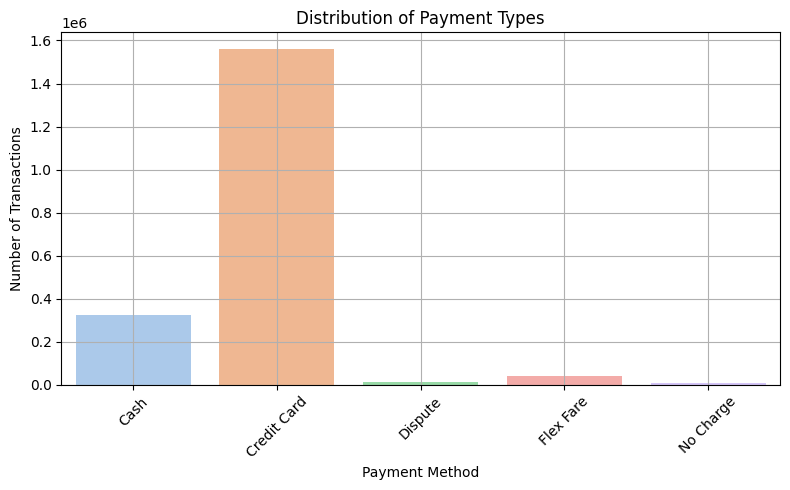

In [487]:
# Analyse the distribution of different payment types (payment_type).

payment_counts = df['payment_type_label'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




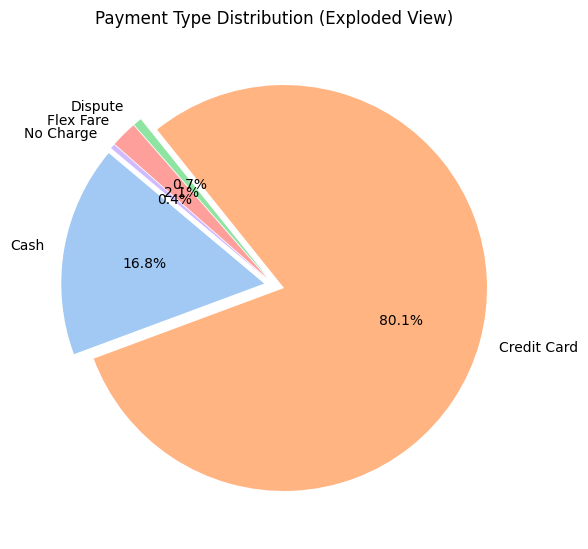

In [491]:
explode = [0.05] * len(payment_counts)  # Adjust the value for more/less separation

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(payment_counts.values,
        labels=payment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        explode=explode,
        colors=sns.color_palette('pastel'))

plt.title("Payment Type Distribution (Exploded View)")
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [493]:
!pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   -------- ------------------------------- 4.2/19.2 MB 22.9 MB/s eta 0:00:01
   ------------------- -------------------- 9.2/19.2 MB 23.8 MB/s eta 0:00:01
   -------------------------- ------------- 12.6/19.2 MB 20.7 MB/s eta 0:00:01
   ----------------------------------- ---- 17.0/19.2 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 20.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------- ----------- 4.5/6.3 MB 24.4 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 19.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 22.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [499]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r"C:\Users\Sherry\UpgradExample\Datasets and Dictionary-NYC\Starter Notebook - EDA NYC Taxi\taxi_zones\taxi_zones.shp")
# read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

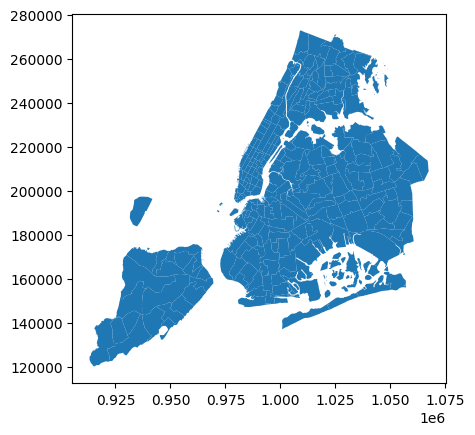

In [501]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [503]:
# Merge zones and trip records using locationID and PULocationID

df = df.merge(zones[['LocationID', 'zone', 'borough']], how='left', left_on='PULocationID', right_on='LocationID')

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947483 entries, 0 to 1947482
Data columns (total 30 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [511]:
# Group data by location and calculate the number of trips

pickup = df['PULocationID'].value_counts().rename_axis('LocationID').reset_index(name='pickup_count')
dropoff = df['DOLocationID'].value_counts().rename_axis('LocationID').reset_index(name='dropoff_count')

# Merge and fill missing values with 0
location_trip_counts = pd.merge(pickup, dropoff, on='LocationID', how='outer').fillna(0)

# Calculate total trips
location_trip_counts['total_trips'] = location_trip_counts['pickup_count'] + location_trip_counts['dropoff_count']
location_trip_counts

,LocationID,pickup_count,dropoff_count,total_trips
0,1,198.0,5593.0,5791.0
1,2,2.0,4.0,6.0
2,3,39.0,164.0,203.0
3,4,2273.0,7370.0,9643.0
4,5,13.0,34.0,47.0
...,...,...,...,...
256,261,10289.0,9280.0,19569.0
257,262,25874.0,30149.0,56023.0
258,263,37490.0,40052.0,77542.0
259,264,17096.0,18275.0,35371.0


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [514]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(location_trip_counts, on='LocationID', how='left')
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,pickup_count,dropoff_count,total_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",198.0,5593.0,5791.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,4.0,6.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",39.0,164.0,203.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",2273.0,7370.0,9643.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",13.0,34.0,47.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

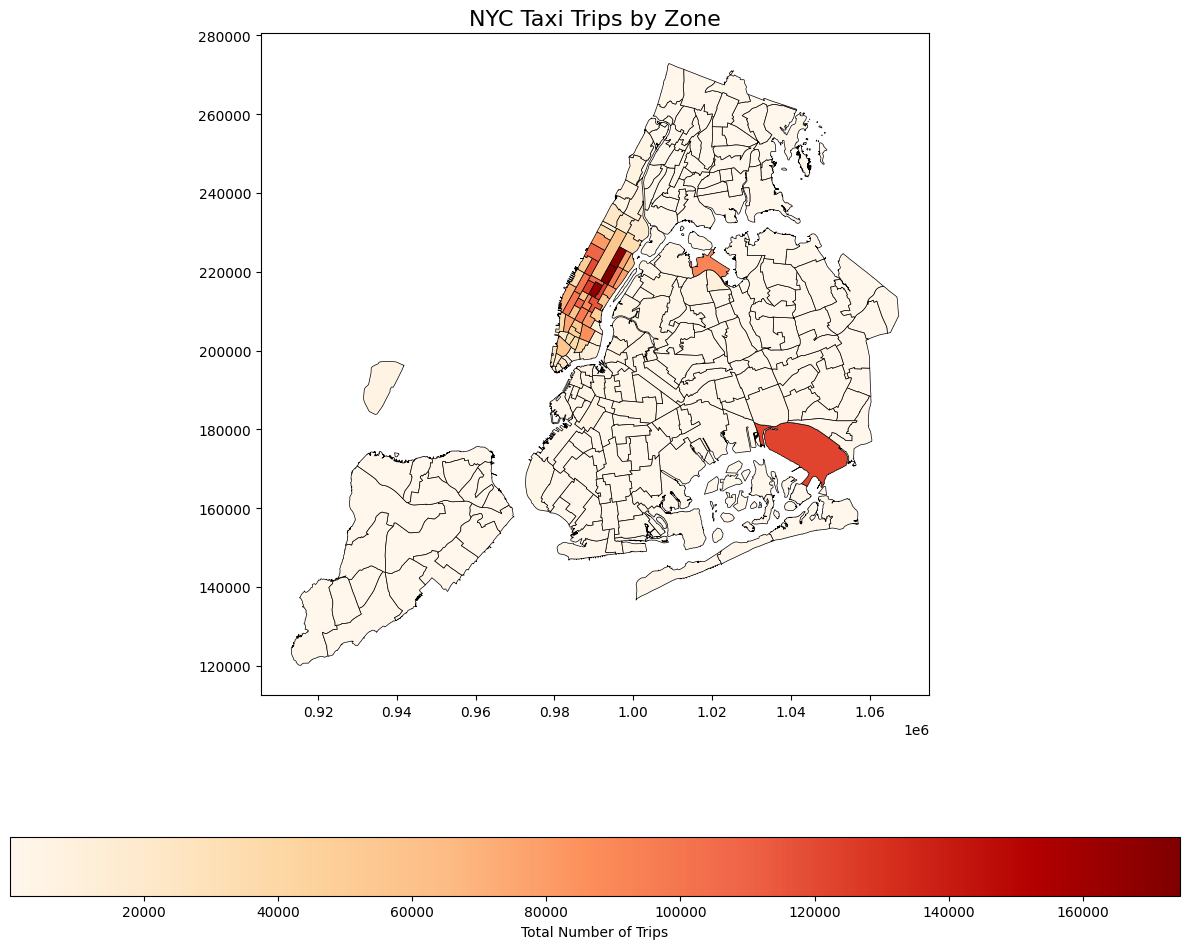

In [520]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


# Plot the map and display it
zones.plot(column='total_trips',
           cmap='OrRd',
           legend=True,
           edgecolor='black',
           linewidth=0.5,
           ax=ax,
           legend_kwds={
               'label': "Total Number of Trips",
               'orientation': "horizontal"  # or "vertical"
           })

ax.set_title("NYC Taxi Trips by Zone", fontsize=16)
plt.tight_layout()
plt.show()



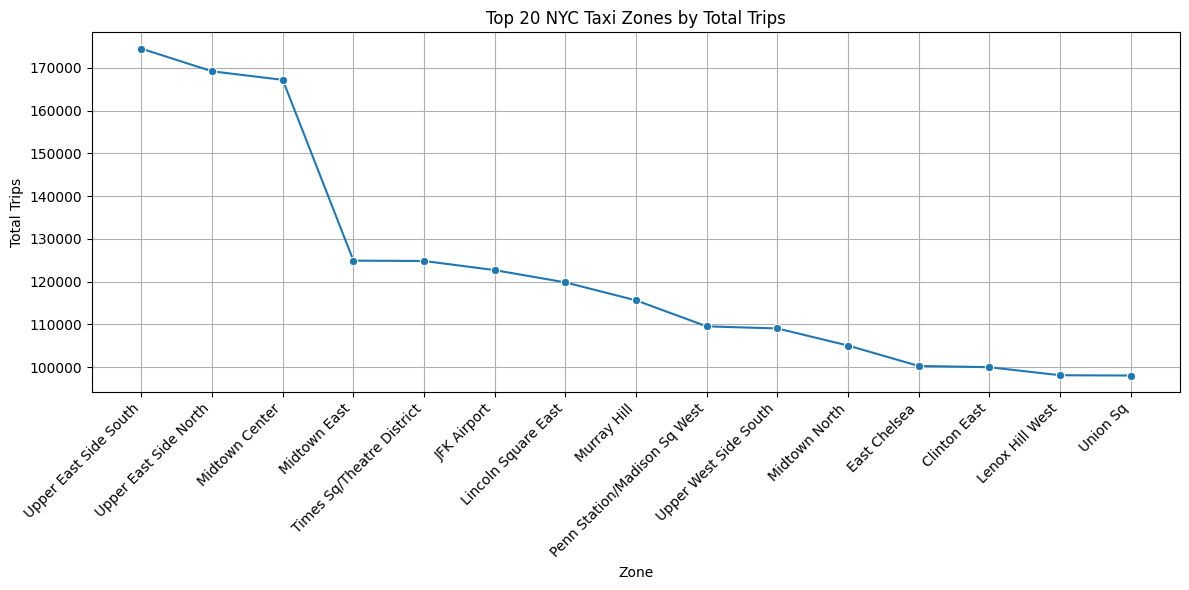

In [524]:
# can you try displaying the zones DF sorted by the number of trips?


sorted_zones = zones.sort_values(by='total_trips', ascending=False)

# Plot top 20 zones (or adjust as needed)
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=sorted_zones['zone'].head(15),
    y=sorted_zones['total_trips'].head(15),
    marker='o'
)

plt.title("Top 20 NYC Taxi Zones by Total Trips")
plt.xlabel("Zone")
plt.ylabel("Total Trips")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [526]:
# Find routes which have the slowest speeds at different times of the day

df['trip_duration_hr'] = df['trip_duration'] / 60  # convert minutes to hours
df['speed_mph'] = df['trip_distance'] / df['trip_duration_hr']



In [540]:
negative_speed_rows = df[df['speed_mph'] < 0]
len(negative_speed_rows)
#remove negative speed rows from the data set 
df = df[df['speed_mph'] >= 0]


In [528]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_of_day'] = df['pickup_hour'].apply(get_time_of_day)
df['route'] = df['zone'] + " ➝ " + df['DOLocationID'].astype(str)



,route,time_of_day,speed_mph
0,Allerton/Pelham Gardens ➝ 10,Morning,17.387074
1,Allerton/Pelham Gardens ➝ 119,Evening,0.000000
2,Allerton/Pelham Gardens ➝ 133,Morning,0.000000
3,Allerton/Pelham Gardens ➝ 137,Morning,14.452188
4,Allerton/Pelham Gardens ➝ 142,Night,12.731092
...,...,...,...
44716,Yorkville West ➝ 95,Night,33.024821
44717,Yorkville West ➝ 97,Afternoon,16.922724
44718,Yorkville West ➝ 97,Evening,18.859933
44719,Yorkville West ➝ 97,Morning,21.771459


In [542]:
route_speeds = df[(df['speed_mph'] > 0)].groupby(['route', 'time_of_day'])['speed_mph'].mean().reset_index()
route_speeds

,route,time_of_day,speed_mph
0,Allerton/Pelham Gardens ➝ 10,Morning,17.387074
1,Allerton/Pelham Gardens ➝ 137,Morning,14.452188
2,Allerton/Pelham Gardens ➝ 142,Night,12.731092
3,Allerton/Pelham Gardens ➝ 147,Afternoon,14.716981
4,Allerton/Pelham Gardens ➝ 163,Morning,17.384074
...,...,...,...
43366,Yorkville West ➝ 95,Night,33.024821
43367,Yorkville West ➝ 97,Afternoon,16.922724
43368,Yorkville West ➝ 97,Evening,18.859933
43369,Yorkville West ➝ 97,Morning,21.771459


In [546]:
#Below are the slowest routes at different time of day
slowest_routes = route_speeds.sort_values(['time_of_day', 'speed_mph']).groupby('time_of_day').head(1)
print(slowest_routes)


                                route time_of_day  speed_mph
16515              Howard Beach ➝ 129   Afternoon   0.072029
39723  Washington Heights North ➝ 264     Evening   0.007772
4109                Central Park ➝ 10     Morning   0.022236
15307   Greenwich Village North ➝ 235       Night   0.048105


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

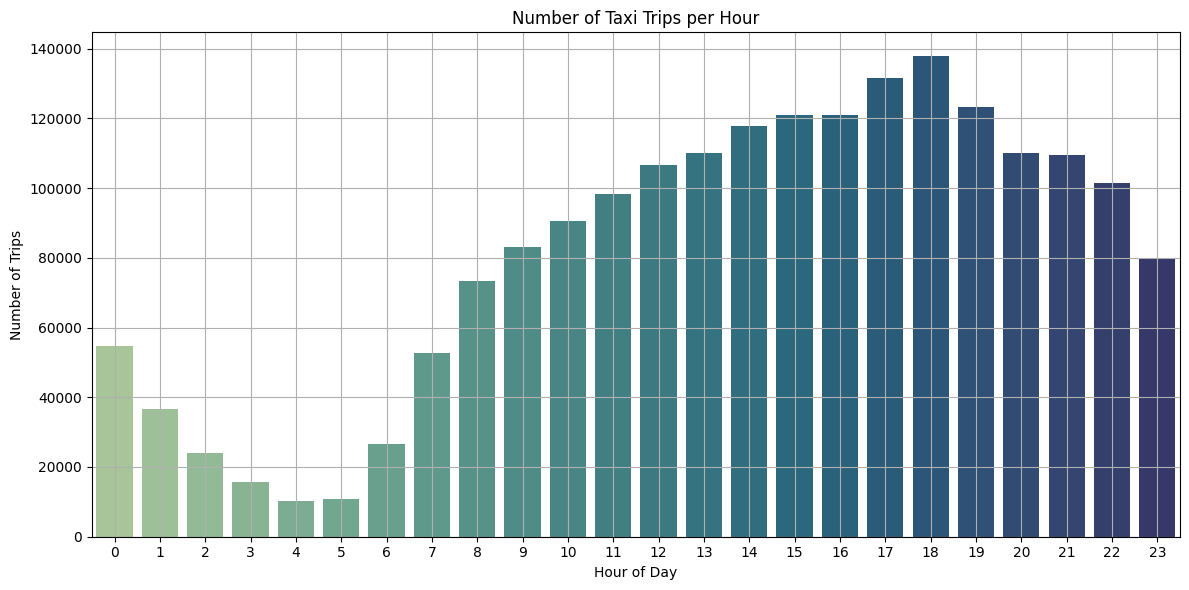

In [561]:
# Visualise the number of trips per hour and find the busiest hour

hourly_counts = df['pickup_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values,hue=hourly_counts.index, palette='crest', legend=False)

plt.title("Number of Taxi Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


**Busiest time is between 6 - 7 PM.**

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [565]:
hourly_counts = df['pickup_hour'].value_counts().sort_values(ascending=False)
top_5_hours = hourly_counts.head(5)


# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.05
estimated_top_5 = (top_5_hours / sample_fraction).astype(int)

print("Estimated Total Trips in Top 5 Busiest Hours:")
print(estimated_top_5)





Estimated Total Trips in Top 5 Busiest Hours:
pickup_hour
18    2755620
17    2629080
19    2466940
16    2420800
15    2420100
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [568]:
# Compare traffic trends for the week days and weekends
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['day_type'] = df['pickup_dayofweek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')


In [570]:
hourly_trends = df.groupby(['pickup_hour', 'day_type']).size().reset_index(name='trip_count')
hourly_trends.head(10)

,pickup_hour,day_type,trip_count
0,0,Weekday,27286
1,0,Weekend,27518
2,1,Weekday,13865
3,1,Weekend,22779
4,2,Weekday,7496
5,2,Weekend,16592
6,3,Weekday,4694
7,3,Weekend,11059
8,4,Weekday,4478
9,4,Weekend,5874


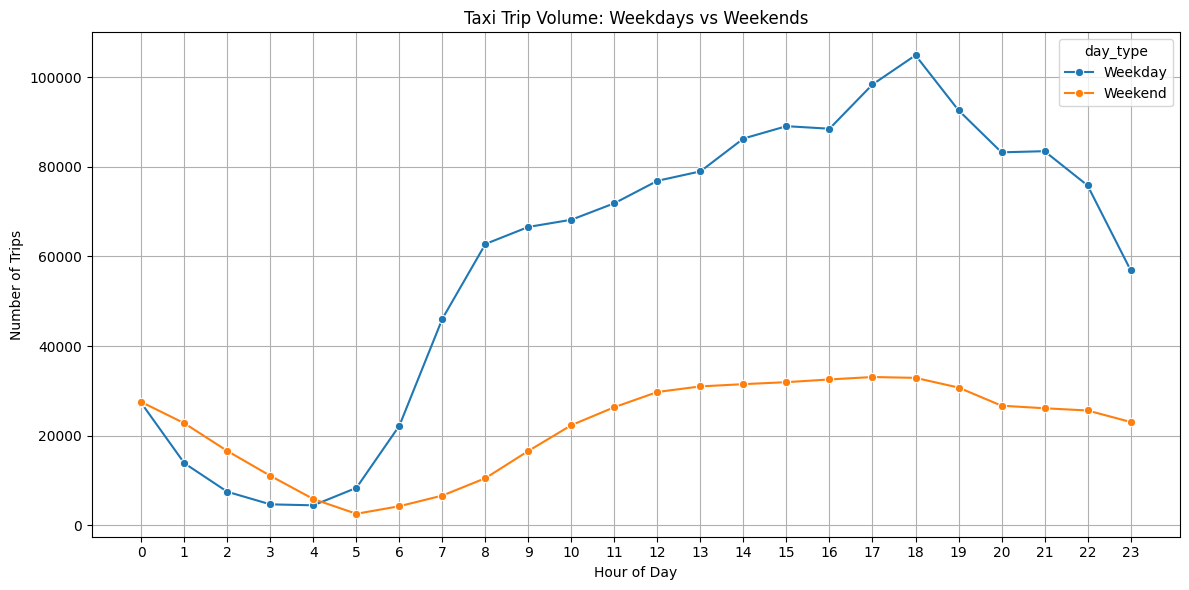

In [572]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trends, x='pickup_hour', y='trip_count', hue='day_type', marker='o')

plt.title("Taxi Trip Volume: Weekdays vs Weekends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


**Trends on weekday vs Weekend**
There is more traffic at late night 12 AM during weekends vs the weekadys.
In general between 4 to 11 PM traffic is high on weekdays may be because of business or employees travelling to there home.

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [579]:
# Find top 10 pickup and dropoff zones

pickup_hourly = df.groupby(['zone', 'pickup_hour']).size().reset_index(name='pickup_count')
dropoff_hourly = df.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='dropoff_count')
dropoff_hourly = dropoff_hourly.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')
dropoff_hourly.drop(columns='LocationID', inplace=True)

top_pickup_zones = pickup_hourly.groupby('zone')['pickup_count'].sum().nlargest(10).index
print (top_pickup_zones)
top_dropoff_zones = dropoff_hourly.groupby('zone')['dropoff_count'].sum().nlargest(10).index
print (top_dropoff_zones)

Index(['JFK Airport', 'Upper East Side South', 'Midtown Center',
       'Upper East Side North', 'Midtown East', 'LaGuardia Airport',
       'Penn Station/Madison Sq West', 'Times Sq/Theatre District',
       'Lincoln Square East', 'Murray Hill'],
      dtype='object', name='zone')
Index(['Upper East Side North', 'Upper East Side South', 'Midtown Center',
       'Times Sq/Theatre District', 'Murray Hill', 'Midtown East',
       'Lincoln Square East', 'Upper West Side South', 'Lenox Hill West',
       'East Chelsea'],
      dtype='object', name='zone')


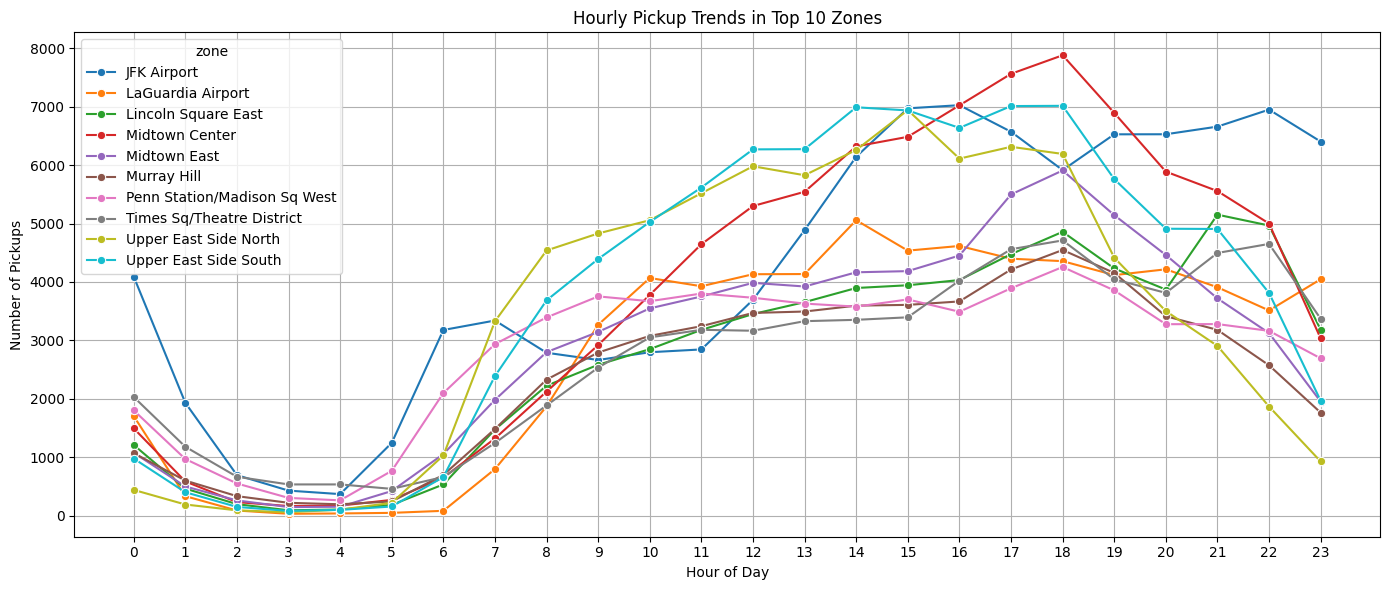

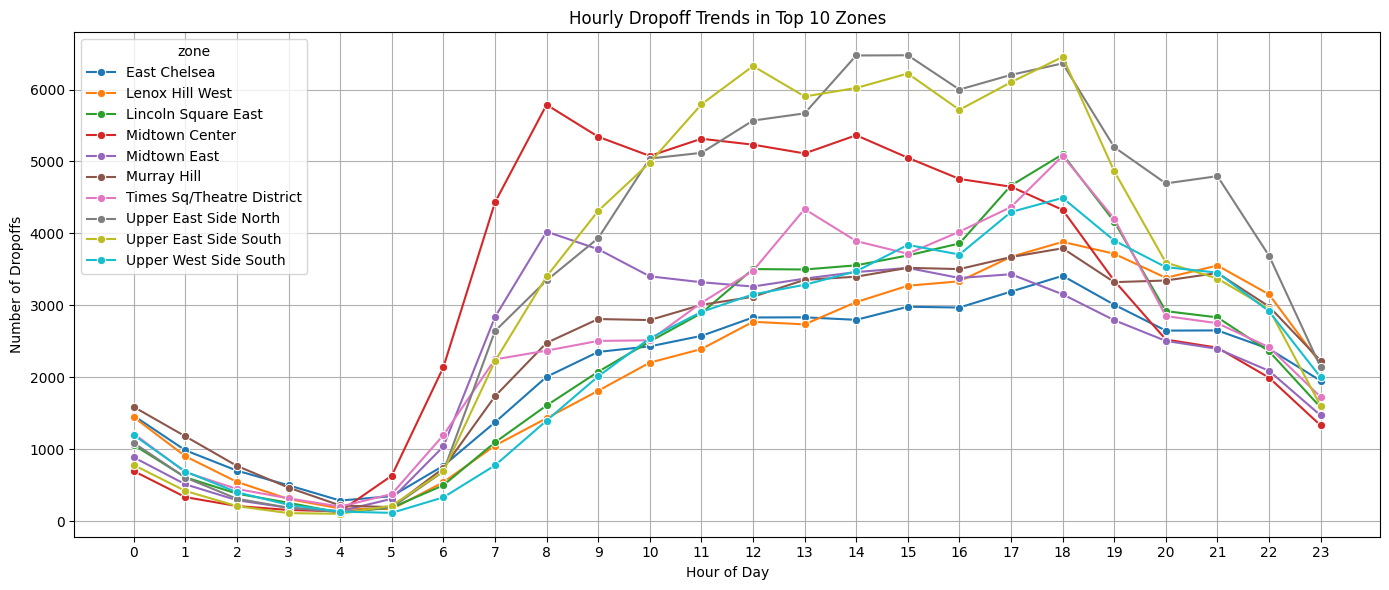

In [582]:
pickup_top = pickup_hourly[pickup_hourly['zone'].isin(top_pickup_zones)]
dropoff_top = dropoff_hourly[dropoff_hourly['zone'].isin(top_dropoff_zones)]

# Plot pickup trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=pickup_top, x='pickup_hour', y='pickup_count', hue='zone', marker='o')
plt.title("Hourly Pickup Trends in Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot dropoff trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=dropoff_top, x='pickup_hour', y='dropoff_count', hue='zone', marker='o')
plt.title("Hourly Dropoff Trends in Top 10 Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Dropoffs")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [640]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_count')
pickup_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
# Count dropoffs
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoff_count') 
dropoff_counts.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)
# Merge counts
zone_counts = pd.merge(pickup_counts, dropoff_counts, on='LocationID', how='outer').fillna(0)

# Avoid division by zero
zone_counts = zone_counts[(zone_counts['dropoff_count'] > 0) & (zone_counts['pickup_count'] > 0)]

# Compute pickup/dropoff ratio
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count']

#Add zone column
zone_counts = zone_counts.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Top 10 highest ratios
top10 = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Bottom 10 lowest ratios
bottom10 = zone_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\n Bottom 10 Pickup/Dropoff Ratios:")
print(bottom10[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

Top 10 Pickup/Dropoff Ratios:
                             zone  pickup_count  dropoff_count  \
69                  East Elmhurst        8681.0          943.0   
126                   JFK Airport      100661.0        21981.0   
132             LaGuardia Airport       67284.0        24361.0   
179  Penn Station/Madison Sq West       66844.0        42673.0   
108       Greenwich Village South       25903.0        18780.0   
41                   Central Park       32558.0        23716.0   
239                  West Village       43322.0        32497.0   
156                  Midtown East       69352.0        55550.0   
155                Midtown Center       90851.0        76350.0   
98               Garment District       31913.0        26822.0   

     pickup_dropoff_ratio  
69               9.205726  
126              4.579455  
132              2.761956  
179              1.566424  
108              1.379286  
41               1.372828  
239              1.333108  
156              1.

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [652]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Define night hours (11 PM to 5 AM)
night_hours = list(range(0, 5)) + [23]
# [0, 1, 2, 3, 4, 23] as 4 hour window will have traffic till 4:59 mins
# Filter the DataFrame
night_df = df[df['pickup_hour'].isin(night_hours)]

# Count pickups
night_pickups = night_df.groupby('PULocationID').size().reset_index(name='pickup_count')
night_pickups.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
# Count dropoffs
night_dropoffs = night_df.groupby('DOLocationID').size().reset_index(name='dropoff_count')
night_dropoffs.rename(columns={'DOLocationID': 'LocationID'}, inplace=True)

# Merge pickup and dropoff counts
night_traffic = pd.merge(night_pickups, night_dropoffs, on='LocationID', how='outer').fillna(0)

# Calculate total traffic
night_traffic['total_night_traffic'] = night_traffic['pickup_count'] + night_traffic['dropoff_count']

#Add zone column
night_traffic = night_traffic.merge(zones[['LocationID', 'zone']], on='LocationID', how='left')

# Sort by total traffic
top_night_zones = night_traffic.sort_values(by='total_night_traffic', ascending=False).head(10)
print(top_night_zones)

top_night_pickup_zones = night_traffic.sort_values(by='pickup_count', ascending=False).head(10)
print(top_night_pickup_zones)

top_night_dropoff_zones = night_traffic.sort_values(by='dropoff_count', ascending=False).head(10)
print(top_night_dropoff_zones)

     LocationID  pickup_count  dropoff_count  total_night_traffic  \
78           79       16558.0           8800              25358.0   
242         249       13337.0           5190              18527.0   
46           48       10464.0           7122              17586.0   
127         132       13912.0           1147              15059.0   
143         148       10341.0           4629              14970.0   
223         230        8308.0           4583              12891.0   
67           68        6247.0           5882              12129.0   
109         114        9365.0           2672              12037.0   
103         107        5778.0           5979              11757.0   
159         164        6414.0           4259              10673.0   

                          zone  
78                East Village  
242               West Village  
46                Clinton East  
127                JFK Airport  
143            Lower East Side  
223  Times Sq/Theatre District  
67       

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [654]:
# Filter for night hours (11 PM to 5 AM)

def get_time_period(hour):
    return 'Night' if hour in [23, 0, 1, 2, 3, 4] else 'Day'

df['time_period'] = df['pickup_hour'].apply(get_time_period)
revenue_by_period = df.groupby('time_period')['total_amount'].sum().reset_index()
total_revenue = revenue_by_period['total_amount'].sum()

# Add revenue share column
revenue_by_period['revenue_share'] = revenue_by_period['total_amount'] / total_revenue
print(revenue_by_period)

  time_period  total_amount  revenue_share
0         Day   50032020.54       0.885585
1       Night    6464009.88       0.114415


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [656]:
# Analyse the fare per mile per passenger for different passenger counts

df_nonzerotrip = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)]
df_nonzerotrip['fare_per_mile_per_passenger'] = df_nonzerotrip['total_amount'] / (df_nonzerotrip['trip_distance'] * df_nonzerotrip['passenger_count'])

fare_stats = df_nonzerotrip.groupby('passenger_count')['fare_per_mile_per_passenger'].agg(['mean', 'median', 'count']).reset_index()
print(fare_stats)


C:\Users\Sherry\AppData\Local\Temp\ipykernel_11388\1008790237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzerotrip['fare_per_mile_per_passenger'] = df_nonzerotrip['total_amount'] / (df_nonzerotrip['trip_distance'] * df_nonzerotrip['passenger_count'])


   passenger_count       mean     median    count
0              1.0  16.642746  11.394958  1465055
1              2.0   9.308108   5.486631   288161
2              3.0   5.748642   3.705356    71576
3              4.0   5.848518   2.708333    39462
4              5.0   2.761556   2.245989    24882
5              6.0   2.214246   1.891815    16616


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [668]:
# Compare the average fare per mile for different days and for different times of the day

# Calculate fare per mile
df_nonzerotrip['fare_per_mile'] = df_nonzerotrip['total_amount'] / df_nonzerotrip['trip_distance']

fare_by_day = df_nonzerotrip.groupby('pickup_day')['fare_per_mile'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

fare_by_hour = df_nonzerotrip.groupby('pickup_hour')['fare_per_mile'].mean()

print("Fare by Day",fare_by_day)
print("Fare by hour", fare_by_hour)

C:\Users\Sherry\AppData\Local\Temp\ipykernel_11388\3179039869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzerotrip['fare_per_mile'] = df_nonzerotrip['total_amount'] / df_nonzerotrip['trip_distance']


Fare by Day pickup_day
Monday       16.690505
Tuesday      17.435274
Wednesday    17.045675
Thursday     17.121152
Friday       16.881214
Saturday     16.122162
Sunday       18.050026
Name: fare_per_mile, dtype: float64
Fare by hour pickup_hour
0     15.745927
1     17.019776
2     15.368973
3     16.752811
4     18.852770
5     20.698345
6     15.582748
7     14.966662
8     15.315742
9     15.502052
10    15.781852
11    16.267838
12    17.185356
13    17.479966
14    16.763815
15    18.039635
16    21.347213
17    19.408165
18    18.569847
19    18.463796
20    15.037497
21    14.701038
22    15.384210
23    16.047008
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [674]:
# Compare fare per mile for different vendors
df_nonzerotrip

vendor_fares = df_nonzerotrip.groupby('VendorID')['fare_per_mile'].agg(['mean', 'median', 'count']).reset_index()
print(vendor_fares)



   VendorID       mean     median    count
0         1  13.308087  11.407407   476121
1         2  18.279316  11.274725  1429624
2         6  12.064572   9.900990        7


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


C:\Users\Sherry\AppData\Local\Temp\ipykernel_11388\3727777382.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonzerotrip['distance_tier'] = df_nonzerotrip['trip_distance'].apply(distance_tier)


   VendorID distance_tier  fare_per_mile
0         1     0–2 miles      17.187697
1         1     2–5 miles       9.184617
2         1      5+ miles       5.990546
3         2     0–2 miles      26.878538
4         2     2–5 miles       9.460546
5         2      5+ miles       6.155048
6         6     0–2 miles      25.333333
7         6     2–5 miles      14.214047
8         6      5+ miles       7.672644


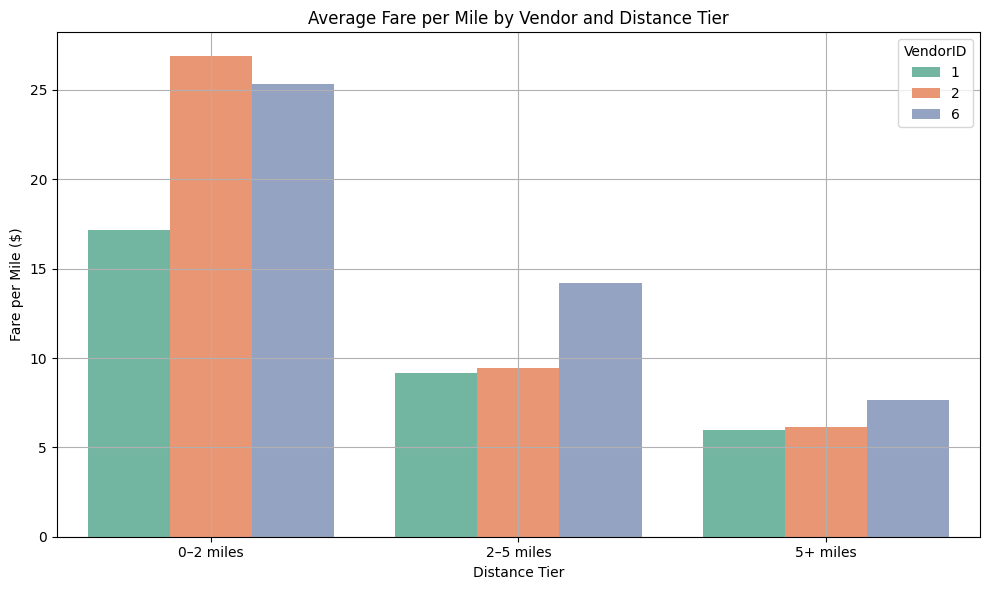

In [678]:
# Defining distance tiers
def distance_tier(dist):
    if dist <= 2:
        return '0–2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '5+ miles'

df_nonzerotrip['distance_tier'] = df_nonzerotrip['trip_distance'].apply(distance_tier)
tiered_fares = df_nonzerotrip.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
print (tiered_fares)
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fares, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='Set2')

plt.title("Average Fare per Mile by Vendor and Distance Tier")
plt.xlabel("Distance Tier")
plt.ylabel("Fare per Mile ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [686]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df['tip_percent'] = (df['tip_amount'] / df['total_amount']) * 100
df['distance_tier'] = df['trip_distance'].apply(distance_tier)
tip_by_distance = df.groupby('distance_tier')['tip_percent'].mean().reset_index()
print(tip_by_distance)
tip_by_passenger = df[df['passenger_count'] > 0].groupby('passenger_count')['tip_percent'].mean().reset_index()
print(tip_by_passenger)
tip_by_hour = df.groupby('pickup_hour')['tip_percent'].mean().reset_index()
print(tip_by_hour)


  distance_tier  tip_percent
0     0–2 miles    12.053035
1     2–5 miles    12.234527
2      5+ miles    11.280166
   passenger_count  tip_percent
0              1.0    12.082660
1              2.0    11.771686
2              3.0    11.358086
3              4.0    10.466442
4              5.0    12.116323
5              6.0    12.209256
    pickup_hour  tip_percent
0             0    11.861455
1             1    11.832382
2             2    11.639764
3             3    11.179685
4             4    10.346102
5             5    10.136287
6             6    11.023918
7             7    11.850445
8             8    12.181061
9             9    12.033606
10           10    11.762246
11           11    11.756538
12           12    11.761377
13           13    11.705225
14           14    11.766097
15           15    11.749014
16           16    11.774628
17           17    12.041503
18           18    12.224745
19           19    12.194702
20           20    12.404647
21           21    12.

C:\Users\Sherry\AppData\Local\Temp\ipykernel_11388\895667400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_by_distance, x='distance_tier', y='tip_percent', palette='Blues')


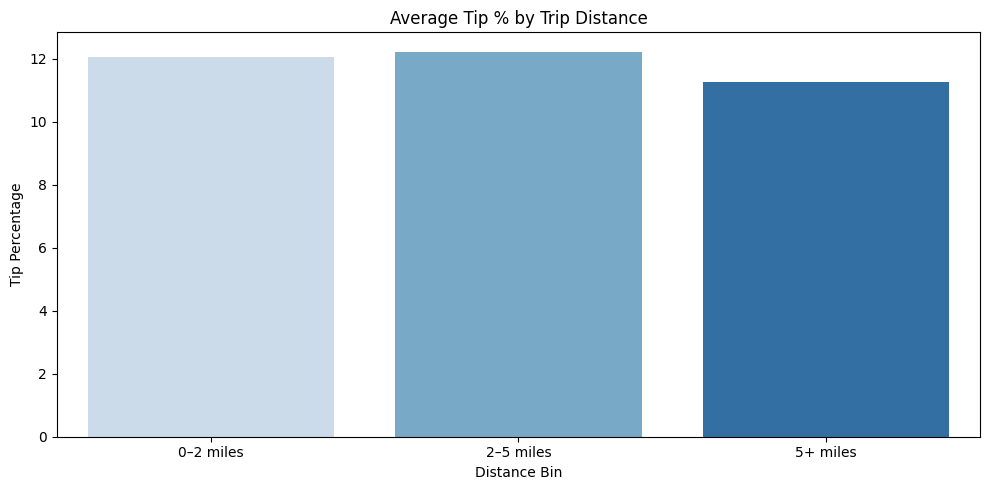

C:\Users\Sherry\AppData\Local\Temp\ipykernel_11388\895667400.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percent', palette='Greens')


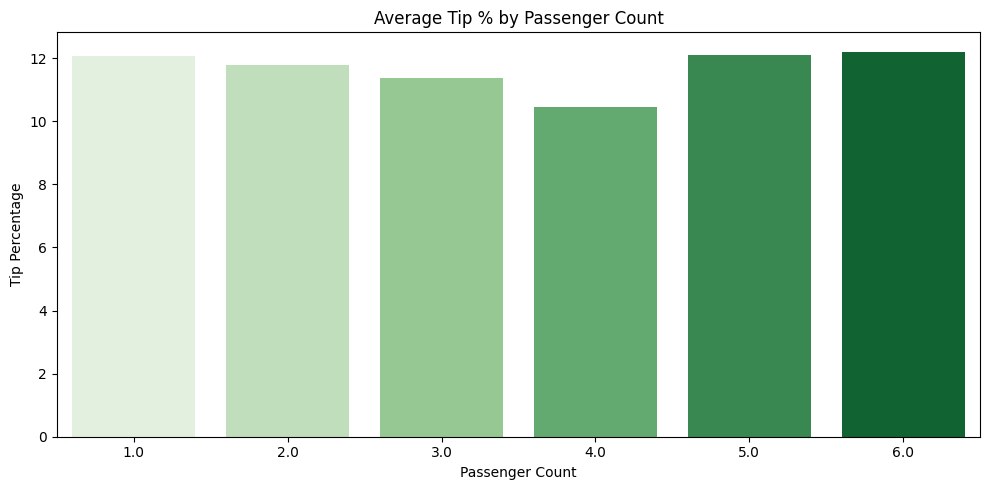

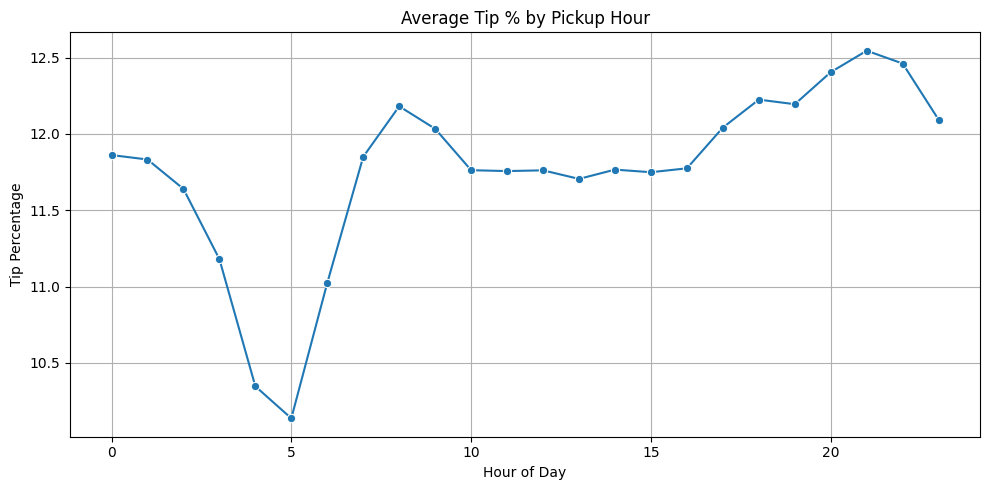

In [688]:
# Distance
plt.figure(figsize=(10, 5))
sns.barplot(data=tip_by_distance, x='distance_tier', y='tip_percent', palette='Blues')
plt.title("Average Tip % by Trip Distance")
plt.ylabel("Tip Percentage")
plt.xlabel("Distance Bin")
plt.tight_layout()
plt.show()

# Passenger Count
plt.figure(figsize=(10, 5))
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percent', palette='Greens')
plt.title("Average Tip % by Passenger Count")
plt.ylabel("Tip Percentage")
plt.xlabel("Passenger Count")
plt.tight_layout()
plt.show()

# Pickup Hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=tip_by_hour, x='pickup_hour', y='tip_percent', marker='o')
plt.title("Average Tip % by Pickup Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Tip Percentage")
plt.grid(True)
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [712]:
# Count drop-offs by DOLocationID
dropoff_counts = df['DOLocationID'].value_counts()

# Get the location with the maximum drop-offs
max_dropoff_location = dropoff_counts.idxmax()
max_dropoff_count = dropoff_counts.max()
print(dropoff_counts)
print(f"Location ID with most drop-offs: {max_dropoff_location} ({max_dropoff_count:,} trips)")
print("zone is ", zones[zones['LocationID'] == max_dropoff_location]['zone'].values[0])

DOLocationID
236    86548
237    82371
161    76350
230    59943
170    57654
       ...  
84         9
187        7
204        6
2          4
99         3
Name: count, Length: 260, dtype: int64
Location ID with most drop-offs: 236 (86,548 trips)
zone is  Upper East Side North


In [716]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip = df[df['tip_percent'] < 10]
high_tip = df[df['tip_percent'] > 25]

comparison = pd.DataFrame({
    'Low Tip (<10%)': {
        'Avg Fare': low_tip['total_amount'].median(),
        'Avg Distance': low_tip['trip_distance'].median(),
        'Avg Duration (min)': low_tip['trip_duration'].median(),
        'Avg Tip %': low_tip['tip_percent'].mean(),
        'Median Passengers Count': low_tip['passenger_count'].median(),
        'Maximum Drop off': zones[zones['LocationID'] == low_tip['DOLocationID'].value_counts().idxmax()]['zone'].values[0],
        'Maximum Pick up':zones[zones['LocationID'] == low_tip['PULocationID'].value_counts().idxmax()]['zone'].values[0],
        'Trip Count': len(low_tip)
    },
    'High Tip (>25%)': {
        'Avg Fare': high_tip['total_amount'].median(),
        'Avg Distance': high_tip['trip_distance'].median(),
        'Avg Duration (min)': high_tip['trip_duration'].median(),
        'Avg Tip %': high_tip['tip_percent'].mean(),
        'Median Passengers Count': high_tip['passenger_count'].median(),
        'Maximum Drop off':zones[zones['LocationID'] == high_tip['DOLocationID'].value_counts().idxmax()]['zone'].values[0],
        'Maximum Pick up':zones[zones['LocationID'] == high_tip['PULocationID'].value_counts().idxmax()]['zone'].values[0],
        'Trip Count': len(high_tip)
    }
})
print(comparison)

                                Low Tip (<10%)            High Tip (>25%)
Avg Fare                                  19.6                       21.0
Avg Distance                               1.8                       1.17
Avg Duration (min)                        13.1                        8.3
Avg Tip %                             2.452221                  34.486054
Median Passengers Count                    1.0                        1.0
Maximum Drop off         Upper East Side South      Upper East Side North
Maximum Pick up                    JFK Airport  Times Sq/Theatre District
Trip Count                              655277                       9581


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

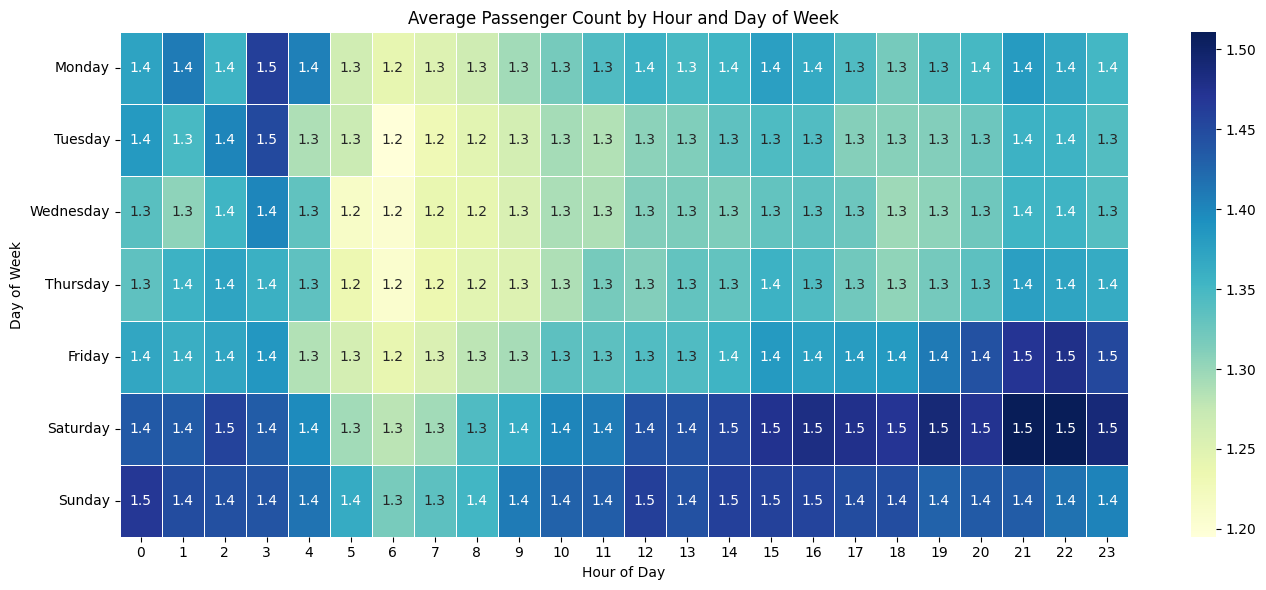

In [718]:
# See how passenger count varies across hours and days

# Average passenger count by hour and day
passenger_trends = df.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().reset_index()

# Pivot for heatmap
pivot_table = passenger_trends.pivot(index='pickup_day', columns='pickup_hour', values='passenger_count')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordered_days)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)

plt.title("Average Passenger Count by Hour and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

C:\Users\Sherry\AppData\Local\Temp\ipykernel_11388\4228150114.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_zones, x='zone', y='mean', palette='viridis')


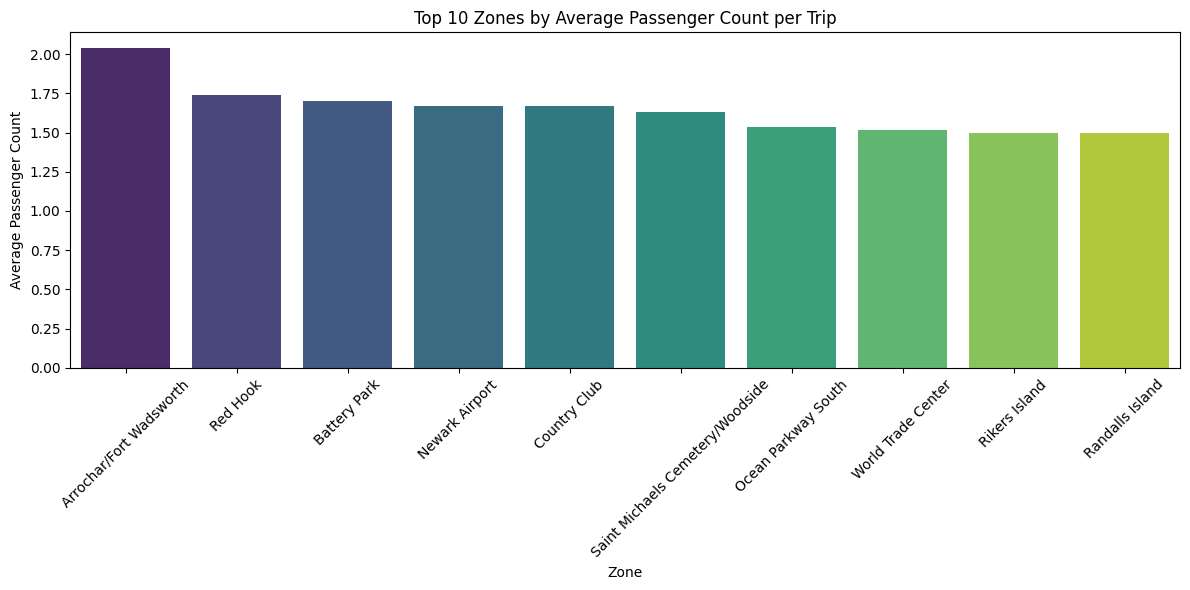

In [720]:
# How does passenger count vary across zones

zone_passenger_stats = df.groupby('zone')['passenger_count'].agg(['mean', 'median', 'sum', 'count']).reset_index()
zone_passenger_stats = zone_passenger_stats.sort_values(by='mean', ascending=False)

top_zones = zone_passenger_stats.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_zones, x='zone', y='mean', palette='viridis')
plt.title("Top 10 Zones by Average Passenger Count per Trip")
plt.ylabel("Average Passenger Count")
plt.xlabel("Zone")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [724]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger = df.groupby('zone')['passenger_count'].mean().reset_index(name='avg_passenger_count')
zones_with_trips = zones.merge(avg_passenger, on='zone', how='left')


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,pickup_count,dropoff_count,total_trips,avg_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",198.0,5593.0,5791.0,1.666667
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,4.0,6.0,1.000000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",39.0,164.0,203.0,1.025641
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",2273.0,7370.0,9643.0,1.354158
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",13.0,34.0,47.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",48.0,212.0,260.0,1.104167
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",328.0,1398.0,1726.0,1.290520
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",10289.0,9280.0,19569.0,1.514677
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",25874.0,30149.0,56023.0,1.299126


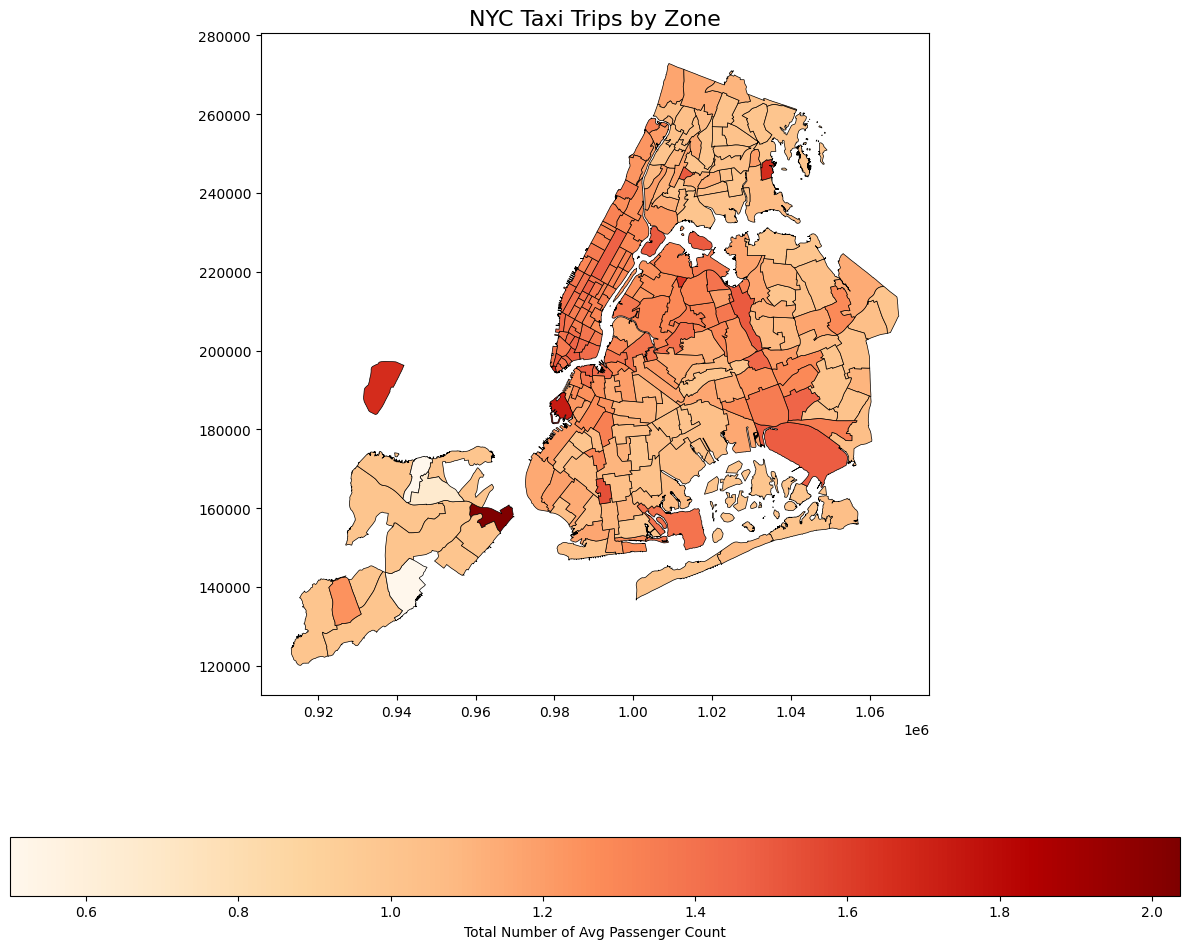

In [728]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


# Plot the map and display it
zones_with_trips.plot(column='avg_passenger_count',
           cmap='OrRd',
           legend=True,
           edgecolor='black',
           linewidth=0.5,
           ax=ax,
           legend_kwds={
               'label': "Total Number of Avg Passenger Count",
               'orientation': "horizontal"  # or "vertical"
           })

ax.set_title("NYC Taxi Trips by Zone", fontsize=16)
plt.tight_layout()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

In [730]:
surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge']

# Count how often each surcharge is applied (non-zero)
surcharge_stats = {
    col: {
        'applied_count': (df[col] > 0).sum(),
        'total_trips': len(df),
        'prevalence_percent': 100 * (df[col] > 0).mean()
    }
    for col in surcharge_cols
}


surcharge_df = pd.DataFrame(surcharge_stats).T
print(surcharge_df)

                       applied_count  total_trips  prevalence_percent
extra                      1188170.0    1947260.0           61.017532
mta_tax                    1931825.0    1947260.0           99.207348
improvement_surcharge      1947049.0    1947260.0           99.989164
congestion_surcharge       1807575.0    1947260.0           92.826587


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [732]:
df.rename(columns={'zone': 'pickup_zone'}, inplace=True)

In [734]:
# Merge dropoff zone names into df
df = df.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how='left')

# Rename the merged column to 'dropoff_zone'
df.rename(columns={'zone': 'dropoff_zone'}, inplace=True)



KeyError: "['LocationID'] not found in axis"

In [738]:
df.drop(columns='LocationID_y', inplace=True)

In [740]:
# How often is each surcharge applied?
df['has_surcharge'] = df[surcharge_cols].sum(axis=1) > 0
# Pickup zones
pickup_surcharge = df.groupby('pickup_zone')['has_surcharge'].mean().reset_index(name='pickup_surcharge_rate')

# Dropoff zones (if you have dropoff zone names)
dropoff_surcharge = df.groupby('dropoff_zone')['has_surcharge'].mean().reset_index(name='dropoff_surcharge_rate')

In [742]:
hourly_surcharge = df.groupby('pickup_hour')['has_surcharge'].mean().reset_index(name='surcharge_rate')

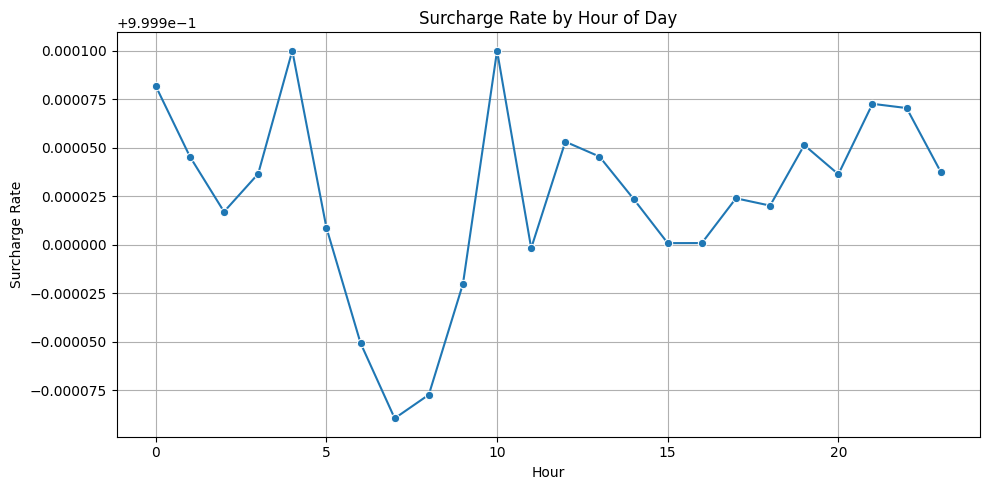

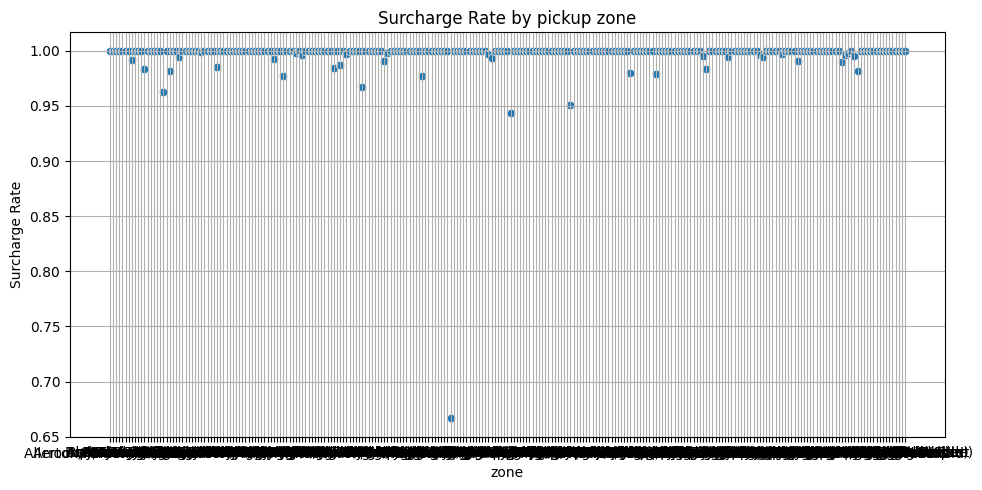

In [748]:
# By hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_surcharge, x='pickup_hour', y='surcharge_rate', marker='o')
plt.title("Surcharge Rate by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Surcharge Rate")
plt.grid(True)
plt.tight_layout()
plt.show()




## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
- Plan for taxis to be available between 2 PM and 7 PM on weekdays, when demand is typically at its highest.
- For nighttime operations, schedule taxis between 12 AM and 5 AM on weekends, as demand tends to be significantly higher during these hours.
- When planning for holidays, prioritize either Monday or Sunday, as pickup volume is generally lower on these days.
- May and October usually see a surge in pickup demand, so plan fleet availability accordingly.
- Focus on shorter trips lasting less than 2 to 3 hours to maximize turnaround and efficiency.
- Since most customers prefer paying by credit card, ensure that taxis are equipped with card payment facilities.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
- Position your taxis in high-demand zones such as Upper East Side South, Upper East Side North, and Midtown Center, where both pickups and drop-offs are consistently high.
- Avoid scheduling pickups and drop-offs on slower routes based on time-of-day variations. This insight can be communicated to drivers to help them choose the fastest available routes.
- Since demand peaks between 5 PM and 7 PM, plan for efficient routing during this window to improve turnaround time.
- By analyzing hourly pickup and drop-off trends, you can better estimate the likelihood of securing a fare in specific areas.
- Certain zones—like East Elmhurst, JFK Airport, and LaGuardia Airport—show high pickup-to-drop-off ratios. Taxis should prioritize trips to and from these areas.
- Based on nighttime pickup and drop-off patterns, taxis can strategically plan their routes to maximize efficiency during late hours


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
- Based on hourly pickup and drop-off zone trends, dynamic pricing strategies can be developed.
- During high-demand periods—especially between 5 PM and 7 PM—fares can be adjusted upward to optimize revenue.
- To maximize earnings, prioritize daytime operations over nighttime, as demand is typically higher during the day.
- Fare pricing should reflect peak demand at specific hours throughout the day.
- Vendor 1 may increase rates for both shorter and longer trips.
- Vendor 2 can focus fare adjustments on trips longer than 2 miles.
- Revenue is generally higher during March, April, May, June, October, November, and December compared to other months.
- If planning vehicle servicing or holidays, February is ideal, as it tends to have the lowest revenue. Further analysis of pickup times and zones may help boost revenue in off-peak months.
- Trips under 50 miles tend to be more profitable. Avoid assigning taxis to longer routes, as longer duration doesn't always mean higher earnings.
- Tips are typically higher for shorter trips, whereas between 3 AM and 7 AM, tip amounts are significantly lower.
- Surcharges are least common from 5 AM to 9 AM, which could impact fare planning during early morning hours.
